In [1]:
# ячейка чтобы быстро выводить сумму по какому-то столбцу
import pandas as pd

df = pd.read_csv('realtor-data.csv', low_memory=False)
mean_line_price = round(df['price'].mean(), 2)
print(f"Среднее значение по столбцу 'price': {mean_line_price}") # Среднее значение по непустым значениям в столбце
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Ошибочные значения станут NaN
total_sum = df['price'].sum()
print(total_sum)

Среднее значение по столбцу 'price': 524195.52
1166251683.33419


In [41]:
# словарь с количеством пропущенных значений по каждому стобцу в таблице
import pandas as pd

df = pd.read_csv('realtor-data.csv', low_memory=False)
missing_percentage_dict = (round(df.isnull().mean() * 100, 2)).to_dict()
print(missing_percentage_dict)

{'brokered_by': 0.2, 'status': 0.0, 'price': 0.07, 'bed': 21.62, 'bath': 22.99, 'acre_lot': 14.62, 'street': 0.49, 'city': 0.06, 'state': 0.0, 'zip_code': 0.01, 'house_size': 25.53, 'prev_sold_date': 32.98}


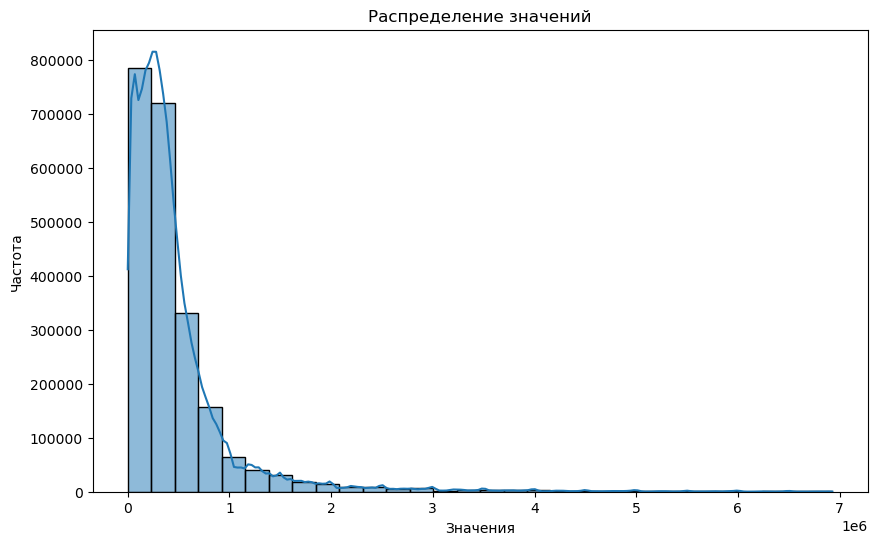

In [96]:
# Гистограмма плотности
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), kde=True, bins=30)  # 'kde=True' добавляет кривую плотности
plt.title('Распределение значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

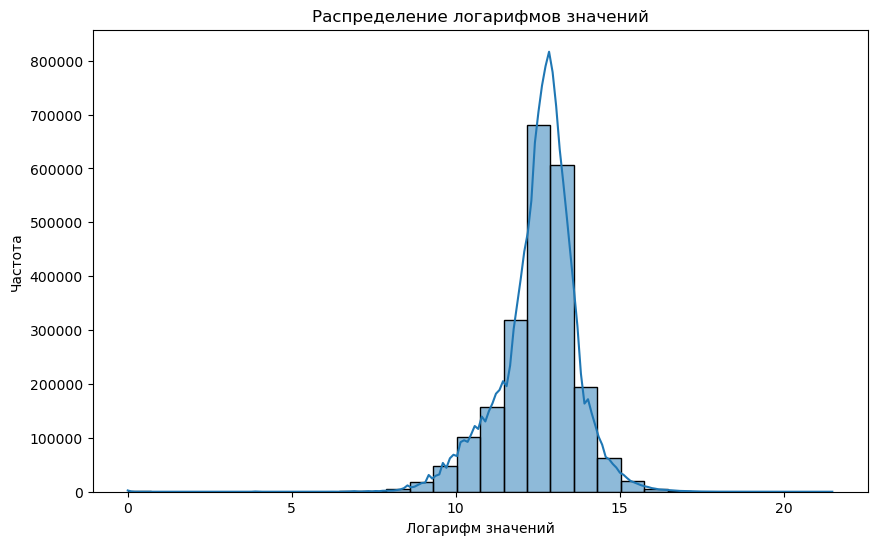

In [75]:
# Лог-распределение
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# Убираем пропуски и значения <= 0, так как логарифм от 0 или отрицательных чисел не существует
df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)
warnings.filterwarnings('ignore', category=FutureWarning)
df_clean = df['price'].dropna()
df_clean = df_clean[df_clean > 0]

log_values = np.log(df_clean)

plt.figure(figsize=(10, 6))
sns.histplot(log_values, kde=True, bins=30)
plt.title('Распределение логарифмов значений')
plt.xlabel('Логарифм значений')
plt.ylabel('Частота')
plt.show()

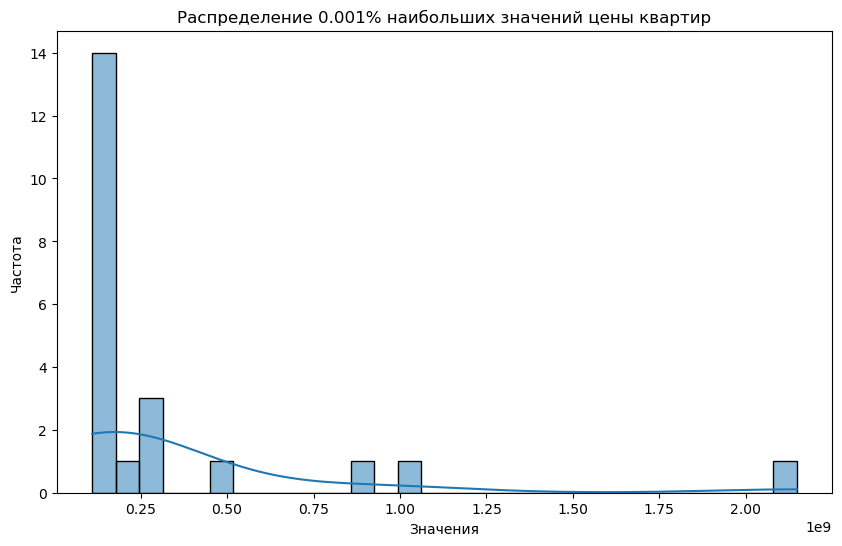

In [74]:
# Построение распределения по топу значений какого-то показателя
import warnings
import pandas as pd

warnings.filterwarnings('ignore', category=FutureWarning)
df = pd.read_csv('realtor-data.csv', low_memory=False)
top_percent = 0.00001
top_values = df['price'].dropna().nlargest(int(len(df) * top_percent))

# Строим распределение для этих значений
plt.figure(figsize=(10, 6))
sns.histplot(top_values, kde=True, bins=30)
plt.title(f'Распределение {top_percent * 100}% наибольших значений цены квартир')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

 0.15
 0.85


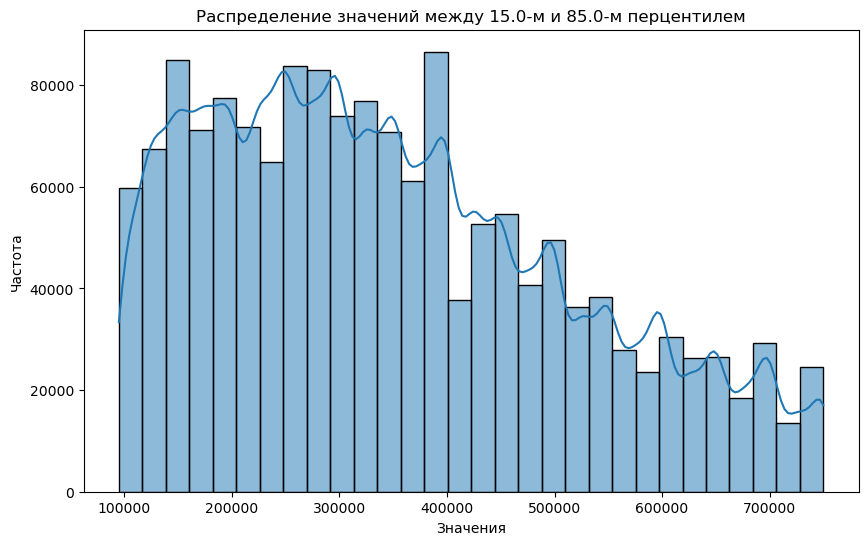

In [73]:
# ячейка для демонстрации распределения значений между какими-то перцентилями
import pandas as pd

x, y = float(input()), float(input())
df = pd.read_csv('realtor-data.csv', low_memory=False)
ql = df['price'].quantile(x)
qh = df['price'].quantile(y)

# Фильтруем данные по этим перцентилям
filtered_data = df[(df['price'] >= ql) & (df['price'] <= qh)]

# Строим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], kde=True, bins=30)
plt.title(f'Распределение значений между {x * 100}-м и {y * 100}-м перцентилем')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [ ]:
# Ячейка для создания файла, очищенного от выбросов (то есть цен превышающих три стандартных отклонения)
import pandas as pd
import numpy as np

df = pd.read_csv('realtor-data.csv', low_memory=False)
mean_price = np.mean(df['price']) 
std_price = np.std(df['price'], ddof=0) 

df['z_score'] = (df['price'] - mean_price) / std_price 

df_cleaned = df[abs(df['z_score']) <= 3].drop(columns=['z_score'])

df_cleaned.to_csv('cleaned_realtor_data.csv', index=False)

In [69]:
# Построение линейной регрессии
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)

s = ['bed', 'price',
     'bath', 'house_size']

df = df.dropna(subset=s)

X = df[['bed', 
     'bath', 'house_size']] 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('\nПараметры линейной регрессии:')
print(f'Свободный член (intercept): {model.intercept_:.3f}') 

for col, coef in zip(X.columns, model.coef_):
    print(f'{col}: {coef:.3f}') 

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f'R² на обучающей выборке: {r2_train:.3f}')
print(f'R² на тестовой выборке: {r2_test:.3f}')


Параметры линейной регрессии:
Свободный член (intercept): 45936.840
bed: -19401.476
bath: 212349.998
house_size: 9.356
R² на обучающей выборке: 0.206
R² на тестовой выборке: 0.200


In [70]:
# Проверка ограничений (мультиколлинеарности) модели линейной регрессии
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df[['bed', 'price',
     'bath', 'house_size']]) 

vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

      Feature       VIF
0       const  6.890577
1         bed  1.714897
2       price  1.257939
3        bath  2.012678
4  house_size  1.055373


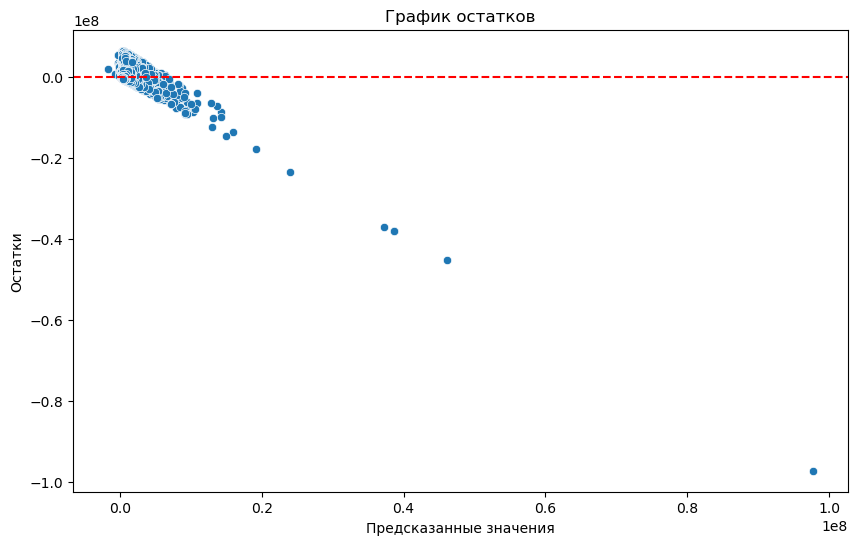

In [71]:
# Проверкв ограничений (гомоскедастичности) модели линейной регрессии
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_train)
residuals = y_train - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

In [72]:
# Проверка ограничений (значимости гомоскедастичности) модели линейной регрессии
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

X_const = add_constant(X_train)

bp_test = het_breuschpagan(residuals, X_const)

print(f'Статистика теста Бройша-Пагана: {bp_test[0]:.3f}')
print(f'p-значение теста Бройша-Пагана: {bp_test[1]:.3f}')

Статистика теста Бройша-Пагана: 284520.616
p-значение теста Бройша-Пагана: 0.000


In [68]:
# Построение лассо-регрессии (которая минимизирует коэффициенты при независимых переменных)
# Чтобы посчитать ридж-регрессию нужно просто везде поменять лассо на ридж 
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)

s = ['bed', 'price',
     'bath', 'house_size']

df = df.dropna(subset=s)

X = df[['bed',
     'bath', 'house_size']]
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  # Устанавливаем параметр регуляризации (alpha)
lasso.fit(X_train, y_train)

# Выводим R² на тестовой выборке
r2 = lasso.score(X_test, y_test)
print(f'R² на тестовой выборке: {r2:.4f}')

y_pred = lasso.predict(X_test)
r2_custom = r2_score(y_test, y_pred)
print(f'R² с использованием r2_score: {r2_custom:.4f}')

R² на тестовой выборке: 0.1995
R² с использованием r2_score: 0.1995


In [67]:
# Кросс-валидация (обучение модели на большом количестве подвыборок)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

df = pd.read_csv('realtor-data.csv', low_memory=False)

s = ['bed', 'price',
     'bath', 'house_size']

df = df.dropna(subset=s)

X = df[['bed',
     'bath', 'house_size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)

# Кросс-валидация из 5 подвыборок
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

print(f'R² для каждой подвыборки: {scores}')
print(f'Среднее значение R²: {scores.mean():.4f}')
print(f'Стандартное отклонение R²: {scores.std():.4f}')

R² для каждой подвыборки: [ 0.01922882  0.12833023  0.08225091 -0.11777936  0.15972421]
Среднее значение R²: 0.0544
Стандартное отклонение R²: 0.0982


In [93]:
# Логистическая регрессия и вывод её параметров
# Она не предназначена для предсказания непрерывных величин
# Здесь она строится относительно бинарной переменнной, связанной с тем, превышвет ли цена дома миллион долларов

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)
# print(df.shape[0])

s = ['price', 'bed', 'bath', 'house_size']

df = df.dropna(subset=s)
# print(df.shape[0])

df['price'] = df['price'].apply(lambda x: 1 if x > 1000000 else 0)

X = df[['bed', 'bath', 'house_size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Коэффициенты логистической регрессии:')
for col, coef in zip(X.columns, logreg.coef_[0]):
    print(f'{col}: {coef:.9f}')

exp_coefs = np.exp(logreg.coef_[0])
print('\nЭкспоненцированные коэффициенты (отношение шансов):')
for col, exp_coef in zip(X.columns, exp_coefs):
    print(f'{col}: {exp_coef:.9f}')

Accuracy: 0.9182
Коэффициенты логистической регрессии:
bed: -0.152254691
bath: 0.939273839
house_size: 0.000127989

Экспоненцированные коэффициенты (отношение шансов):
bed: 0.858769532
bath: 2.558123134
house_size: 1.000127997


In [81]:
# Построение дерева регрессии
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

df = pd.read_csv('realtor-data.csv', low_memory=False)
target = 'price'
features = ['bed',
     'bath', 'house_size']

df = df[[target] + features].dropna() 
print(df.shape[0])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R² of the model: {r2:.4f}')

print('\nВажность признаков:')
for feature, importance in zip(features, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

1605509
R² of the model: -0.0309

Важность признаков:
bed: 0.0901
bath: 0.2135
house_size: 0.6964


In [10]:
# Замер времени обучения модели
import time

start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f'Время на обучение модели: {end_time - start_time:.4f} секунд')

Время на обучение модели: 3.4543 секунд


In [12]:
# Оценка точности модели
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R²: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 2407163505316.9883
R²: -0.0823
Mean Absolute Error (MAE): 341773.1962


In [13]:
# Применение радиальной базисной функции 
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time

df = pd.read_csv('realtor-data.csv', low_memory=False)

target = 'price'
features = ['bed', 'price',
     'bath', 'house_size']
df_model = df[[target] + features].dropna()
df_model = df_model.sample(n=15500, random_state=42)
print(df_model.shape[0])
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели с RBF ядром
# Параметры альфа и гамма нужно подбирать (например, через GridSearchCV)
model = KernelRidge(kernel='rbf', gamma=0.1, alpha=1.0)
model.fit(X_train, y_train)

# Предсказания и оценка качества модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Kernel Ridge Regression (RBF kernel):')
print(f'Среднеквадратичная ошибка (MSE): {mse:.4f}')
print(f'Коэффициент детерминации (R²): {r2:.4f}')

start = time.time()
result = model.fit(X_train, y_train)
end = time.time()

print(f'Время обучения модели: {end - start:.2f} секунд')

15500
Kernel Ridge Regression (RBF kernel):
Среднеквадратичная ошибка (MSE): 1198298858881.1868
Коэффициент детерминации (R²): -0.3810
Время обучения модели: 17.97 секунд


In [58]:
# Автоматизированный перебор параметров РБФ и его сравнение со случайным лесом
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('realtor-data.csv', low_memory=False)

target = 'price'
features = ['bed',
     'bath', 'house_size']
df_model = df[[target] + features].dropna()
df_model = df_model.sample(n=3500, random_state=42)

X = df_model[features]
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определим диапазоны параметров (здесь нет шага, параметры просто выбираются случайно из двух наборов, всего тут 9 вариантов)
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'gamma': [0.01, 0.1, 1.0]
}

# Создаем объект модели
kr_model = KernelRidge(kernel='rbf')

# Инициализация GridSearchCV
# cv - кросс-валидация. На 4 частях выборки модель обучается, на 1 тестируется
# n_jobs=-1 означает, что при вычислениях используются все процессоры
# Значение 1 значило бы использование лишь одного процессора
# scoring='r2' - это критерий, по которому оценивается модель
grid_search = GridSearchCV(kr_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Выводим лучшие параметры и лучший результат
print('Лучшие параметры:', grid_search.best_params_)
print('Лучший R²:', grid_search.best_score_)

# Используем лучшую модель для предсказаний
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Создаём логарифмическое распределение гиперпараметров
# start=-2 - логарифм первой точки 10^-2=0.01
# stop=2 - логарифм последней точки 10^2=100
# 50 - количество значений
param_dist = {
    'alpha': np.logspace(-2, 2, 50),
    'gamma': np.logspace(-2, 1, 50)
}
# n_iter=20 - берётся 20 случайных выборок параметров альфа и гамма
random_search = RandomizedSearchCV(kr_model, param_distributions=param_dist, 
                                     n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print('Лучшие параметры (Randomized):', random_search.best_params_)
print('Лучший R² (Randomized):', random_search.best_score_)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest R²:', r2_score(y_test, y_pred_rf))

Лучшие параметры: {'alpha': 1.0, 'gamma': 0.01}
Лучший R²: 0.28982021360607435
Лучшие параметры (Randomized): {'gamma': 0.040949150623804255, 'alpha': 0.2442053094548651}
Лучший R² (Randomized): 0.28796234430980727
Random Forest R²: 0.05364288513388682


In [65]:
# Выбор наилучшего ядрового метода
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)

mean_price = np.mean(df['price'])
std_dev_price = np.std(df['price'])

df['z_score'] = (df['price'] - mean_price) / std_dev_price

df_model = df[np.abs(df['z_score']) <= 2]
df_model = df_model.drop(columns=['z_score'])

target = 'price'
features = ['bed', 
     'bath', 'house_size']

df_model = df_model[[target] + features].dropna()
df_model = df_model.sample(n=3500, random_state=42)

X = df_model[features]
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Список ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'laplacian', 'cosine']

# Обучение моделей с разными ядрами
results = {}

for kernel in kernels:
    
    model = KernelRidge(kernel=kernel, alpha=5, gamma=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    results[kernel] = r2
    print(f'Ядро: {kernel}, R²: {r2:.4f}')

best_kernel = max(results, key=results.get)
print(f'\nЛучшее ядро: {best_kernel} с R² = {results[best_kernel]:.4f}')

Ядро: linear, R²: -1.9388
Ядро: poly, R²: 0.2524
Ядро: rbf, R²: 0.2149
Ядро: sigmoid, R²: 0.2475
Ядро: laplacian, R²: 0.2467
Ядро: cosine, R²: -2.1801

Лучшее ядро: poly с R² = 0.2524


In [43]:
# Вывод выбросов подвыборки через Z-критерий
import pandas as pd
import numpy as np

df = pd.read_csv('realtor-data.csv', low_memory=False)
data = df['price'].sample(n=1000, random_state=42)

mean = np.mean(data)
std_dev = np.std(data)

z_scores = (data - mean) / std_dev

outliers = data[np.abs(z_scores) > 3]
data = drop

print("Выбросы:")
print(outliers)

Выбросы:
1311003     9995000.0
3553       12475000.0
1258892    32000000.0
1260284    75000000.0
1322225    29625000.0
131218     12995000.0
Name: price, dtype: float64


In [50]:
# Чистка данных от выбросов по z-критерию (выбросы - то что улетело за три стандартных отклонения)
import pandas as pd
import numpy as np

df = pd.read_csv('realtor-data.csv', low_memory=False)

mean_price = np.mean(df['price'])
std_dev_price = np.std(df['price'])

df['z_score'] = (df['price'] - mean_price) / std_dev_price

df_no_outliers = df[np.abs(df['z_score']) <= 3]

df_no_outliers = df_no_outliers.drop(columns=['z_score'])

df_no_outliers.to_csv('cleaned_realtor_data.csv', index=False)

print('Количество строк до удаления выбросов:', len(df))
print('Количество строк после удаления выбросов:', len(df_no_outliers))

Количество строк до удаления выбросов: 2226382
Количество строк после удаления выбросов: 2216618


In [1]:
# Категориальный бустинг
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)
columns_to_check = ['bed', 'bath', 'house_size', 'state', 'city', 'price', 'status', 'acre_lot']
df = df.sample(n=1000000, random_state=78)
df['acre_lot'] = df['acre_lot'].fillna(0)
df = df.dropna(subset=columns_to_check)
X = df[['bed', 'bath', 'house_size', 'state', 'city', 'status', 'acre_lot']]
y = df['price']

categorical_columns = ['state', 'city', 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=16, cat_features=categorical_columns)

model.fit(X_train, y_train)
model.save_model('realtor_model1.cbm')

print(f'R² на тестовой выборке: {model.score(X_test, y_test)}')

feature_importances = model.get_feature_importance()
print('Важность признаков:')
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

0:	learn: 563995.7205514	total: 1.89s	remaining: 31m 32s
1:	learn: 538898.3643716	total: 3.48s	remaining: 28m 57s
2:	learn: 517441.7591344	total: 4.99s	remaining: 27m 38s
3:	learn: 499054.9928287	total: 6.53s	remaining: 27m 6s
4:	learn: 480390.6551126	total: 8.07s	remaining: 26m 46s
5:	learn: 463547.6413089	total: 9.57s	remaining: 26m 25s
6:	learn: 448780.2935532	total: 11.1s	remaining: 26m 13s
7:	learn: 436068.8589199	total: 12.5s	remaining: 25m 52s
8:	learn: 425303.4823374	total: 13.9s	remaining: 25m 34s
9:	learn: 415753.2824059	total: 15.3s	remaining: 25m 15s
10:	learn: 407445.0606599	total: 16.8s	remaining: 25m 7s
11:	learn: 400208.7689740	total: 18.2s	remaining: 24m 55s
12:	learn: 393688.4003886	total: 19.6s	remaining: 24m 45s
13:	learn: 388315.3204187	total: 20.9s	remaining: 24m 34s
14:	learn: 383540.6139066	total: 22.3s	remaining: 24m 23s
15:	learn: 379239.1743171	total: 23.6s	remaining: 24m 12s
16:	learn: 374735.1798974	total: 25s	remaining: 24m 3s
17:	learn: 370360.1161950	tot

In [94]:
# Пример новой строки данных
import pandas as pd

new_data = pd.DataFrame({
    'bed': [3],
    'bath': [2],
    'house_size': [1410],
    'state': ['Georgia'],
    'city': ['Ellabell'],
    'status': ['for_sale'],
    'acre_lot': ['0.5']
    
})

predicted_price = model.predict(new_data)
print(f'Предсказанная цена: {predicted_price[0]}')

Предсказанная цена: 219420.10990038974


In [89]:
# Пример новой строки данных
import pandas as pd 

new_data = pd.DataFrame({
    'bed': [5],
    'bath': [3],
    'house_size': [2848],
    'state': ['California'],
    'city': ['Carlsbad'],
    'status': ['sold'],
    'acre_lot': [0.13]
})

predicted_price = model.predict(new_data)
print(f'Предсказанная цена: {predicted_price[0]}')

Предсказанная цена: 909287.1763734741


In [60]:
# Ядровые методы (метод опорных векторов для решения задачи регрессии)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)

df = df.sample(n=50000, random_state=78)

df['acre_lot'] = df['acre_lot'].fillna(0)

columns_to_check = ['bed', 'bath', 'house_size', 'state', 'city', 'price', 'status', 'acre_lot']
df = df.dropna(subset=columns_to_check)

X = df[['bed', 'bath', 'house_size', 'state', 'city', 'status', 'acre_lot']]
y = df['price']

categorical_columns = ['state', 'city', 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        # Преобразование категориальных признаков с помощью OneHotEncoder
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        # Стандартизация числовых признаков
        ('num', StandardScaler(), ['bed', 'bath', 'house_size', 'acre_lot'])
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=10, epsilon=0.1)) 
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

print(f'R² на тестовой выборке: {r2_score}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2f}')

R2 на тестовой выборке: -0.05921483188805943
MAPE: 103.17


In [61]:
# Проверка на переобучение через разделения выборки на обучающую, валидационную и тестовую
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

df = pd.read_csv('cleaned_realtor_data.csv', low_memory=False)

df = df.sample(n=100000, random_state=78)

df['acre_lot'] = df['acre_lot'].fillna(0)

columns_to_check = ['bed', 'bath', 'house_size', 'state', 'city', 'price', 'status', 'acre_lot']
df = df.dropna(subset=columns_to_check)

X = df[['bed', 'bath', 'house_size', 'state', 'city', 'status', 'acre_lot']]
y = df['price']

categorical_columns = ['state', 'city', 'status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=16, cat_features=categorical_columns, verbose=0)

model.fit(X_train, y_train)

r2_valid = model.score(X_valid, y_valid)
print(f'R² на валидационной выборке: {r2_valid}')

r2_test = model.score(X_test, y_test)
print(f'R² на тестовой выборке: {r2_test}')

y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE на тестовой выборке: {mape:.2f}')

feature_importances = model.get_feature_importance()
print("Важность признаков:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

R² на валидационной выборке: 0.6007518749585418
R² на тестовой выборке: 0.5898568687790273
MAPE на тестовой выборке: 80.32
Важность признаков:
bed: 7.988684669377196
bath: 14.228002262384825
house_size: 16.556851368473666
state: 28.797848823992176
city: 13.868312149496482
status: 5.365804707731383
acre_lot: 13.194496018544282


In [97]:
# Открытие сохранённой модели
from catboost import CatBoostRegressor
import pandas as pd

model = CatBoostRegressor()
model.load_model('realtor_model1.cbm')

new_data = {
    'bed': [2], 
    'bath': [2],
    'house_size': [990],
    'state': ['California'], 
    'city': ['Oceancide'],
    'status': ['sold'],
    'acre_lot': [0.17]
}

new_data_df = pd.DataFrame(new_data)
y_pred = model.predict(new_data_df)
print(y_pred)

[590581.07523978]
